In [1]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df= pd.read_csv(
    "../Resources/global_food_wastage_dataset.csv",
    index_col="Country")

# Display sample data
df.head(10)

,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Country,,,,,,,
Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
Germany,2024,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
China,2019,Fruits & Vegetables,12791.20,12233.28,90.80,1229.29,59.90
UK,2019,Meat & Seafood,14795.65,14346.97,128.91,450.33,59.01


In [ ]:
df.info()
#No Null values-no need for imputation 
#Food Category is a string-May need encoding

In [ ]:
# Generate summary statistics
df.describe()

In [ ]:
#Going to need a scalar

In [ ]:
sns.pairplot(data=df)
plt.show()

In [3]:
df = df.drop(columns=["Food Category"])


In [ ]:
#Look at Economic loss and total waste, strong correlation

In [4]:
df.columns

Index(['Year', 'Total Waste (Tons)', 'Economic Loss (Million $)',
       'Avg Waste per Capita (Kg)', 'Population (Million)',
       'Household Waste (%)'],
      dtype='object')

In [5]:
num_cols = ['Total Waste (Tons)',
       'Economic Loss (Million $)', 'Avg Waste per Capita (Kg)',
       'Population (Million)', 'Household Waste (%)']

In [ ]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()

In [ ]:
#standard Scalar 
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [ ]:
# Correlations
corrs = df_scaled.corr()
corrs

In [ ]:
sns.heatmap(corrs)
plt.show()

## Unsupervised Clustering

In [6]:
# Do Unsupervised Clustering

# KMeans not scaled

# Define your "X" - features to predict
X = df

In [13]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,5.487138e+11,0.608303,13982.412812
1,3,2.655289e+11,0.552671,17109.337362
2,4,1.649537e+11,0.513858,19373.594158
3,5,1.158841e+11,0.488037,21206.717831
4,6,8.893806e+10,0.467383,22403.391812
5,7,7.193301e+10,0.448721,23275.171776
6,8,6.015861e+10,0.436338,23990.524918
7,9,5.295206e+10,0.419105,23927.649542
8,10,4.821539e+10,0.419208,23408.301883
9,11,4.233594e+10,0.405964,24057.791638


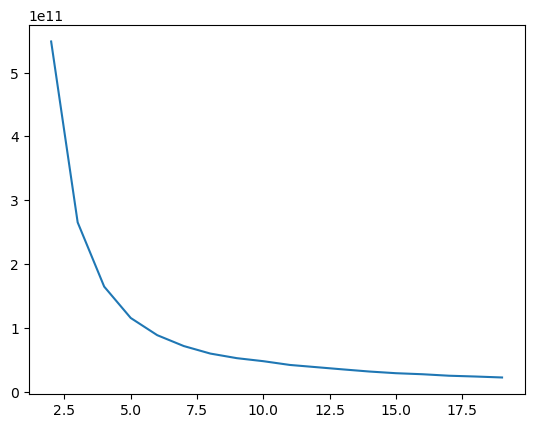

In [14]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

## Agglomerative Clustering

In [8]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.602722,13560.416801
1,3,0.496820,13516.573379
2,4,0.492910,17753.832987
3,5,0.478608,19114.271412
4,6,0.417686,18619.739245
5,7,0.416367,19696.195466
6,8,0.386426,20821.412867
7,9,0.388041,21685.875847
8,10,0.386397,21335.509612
9,11,0.384204,21012.058401


In [17]:
#BIRCH
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 20))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.602722,13560.416801
1,3,0.496820,13516.573379
2,4,0.492910,17753.832987
3,5,0.478608,19114.271412
4,6,0.417686,18619.739245
5,7,0.416367,19696.195466
6,8,0.386426,20821.412867
7,9,0.388041,21685.875847
8,10,0.386397,21335.509612
9,11,0.384204,21012.058401


## Visualize the K Means best model

In [ ]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=5, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on UnSCALED Data")
plt.show()

In [ ]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=3, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

In [ ]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on UnSCALED Data 3 Clusters")
plt.show()

## Fitting to Agglomerative Clustering

In [11]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = AgglomerativeClustering(n_clusters=3)

# Fit the model
model.fit(X)

# Get cluster labels
df_sub['clusters'] = model.labels_

df_sub.head()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),clusters
Country,,,,,,,
Australia,2019,19268.63,18686.68,72.69,87.59,53.64,2
Indonesia,2019,3916.97,4394.48,192.52,1153.99,30.61,1
Germany,2022,9700.16,8909.16,166.94,1006.11,48.08,1
France,2023,46299.69,40551.22,120.19,953.05,31.91,0
France,2023,33096.57,36980.82,104.74,1105.47,36.06,0


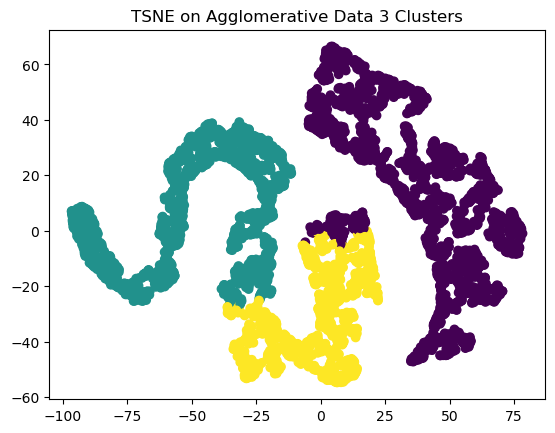

In [12]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on Agglomerative Data 3 Clusters")
plt.show()

## Fitting on Birch Clustering

In [20]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = Birch(n_clusters=3)

# Fit the model
model.fit(X)

# Get cluster labels
df_sub['clusters'] = model.labels_

df_sub.head()

,Year,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%),clusters
Country,,,,,,,
Australia,2019,19268.63,18686.68,72.69,87.59,53.64,2
Indonesia,2019,3916.97,4394.48,192.52,1153.99,30.61,1
Germany,2022,9700.16,8909.16,166.94,1006.11,48.08,1
France,2023,46299.69,40551.22,120.19,953.05,31.91,0
France,2023,33096.57,36980.82,104.74,1105.47,36.06,0


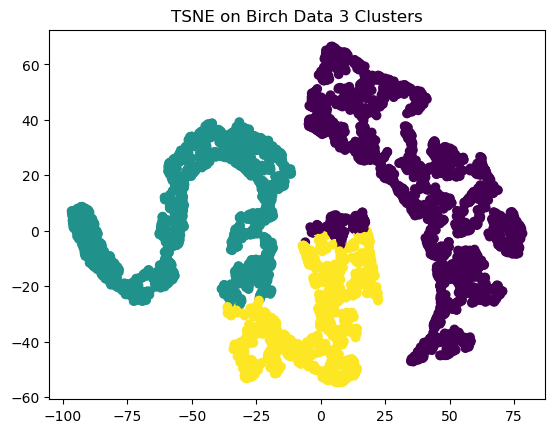

In [21]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on Birch Data 3 Clusters")
plt.show()